In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing import image

2024-11-16 23:13:36.836074: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-16 23:13:36.859849: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-16 23:13:36.866740: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-16 23:13:36.890551: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-16 23:13:39.203414: W tensorflow/compiler/tf2

### Load the image

In [2]:
img_path = 'test2.png'
img = Image.open(img_path).resize((96, 96))
img = np.array(img)
img = np.array(img).astype('float32')

In [3]:
def show_data(img, n=1, title=""):
    plt.figure(figsize=(10, 10))
    plt.imshow(image.array_to_img(img))
    plt.suptitle(title, fontsize = 20)

In [4]:
img.shape

(96, 96, 3)

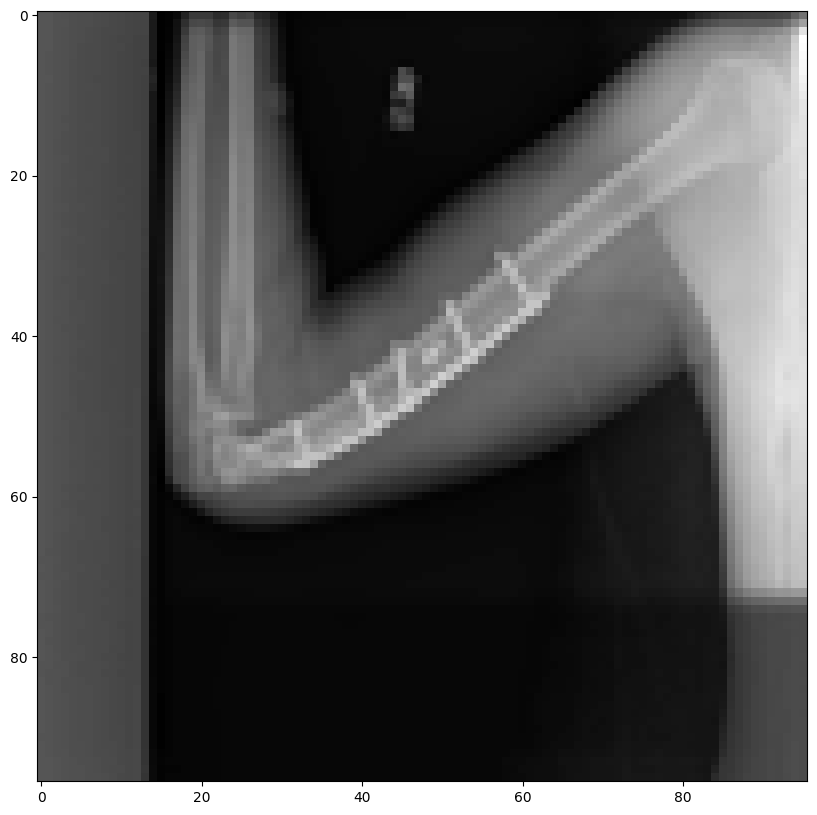

In [5]:
show_data(img)

### Load the encoder model

In [6]:
from keras.models import load_model
encoder = load_model('encoder.h5')

In [7]:
img = img.reshape(1,96,96,3)

### Get the latent vector

In [8]:
latent_vectors = encoder.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [9]:
img = pd.DataFrame(latent_vectors)
X = img.astype('float32') / 255.0

### Load the classifier model

In [10]:
classifier = load_model('classifier.h5')
output, y_pred = classifier.predict(X)
y_pred = (y_pred > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


### Class Prediction

In [11]:
y_pred

array([[1]])